# Assignment 2

## Question 1
Imagine we wished to find points in one image which matched to the same world point in another image---so-called feature point correspondence matching. We are tasked with designing an image feature point algorithm which could match world points in the following three pairs of images.

<p>
<img src="RISHLibrary1.jpg" width="100">
<img src="RISHLibrary2.jpg" width="100">
<img src="Chase1.jpg" width="100">
<img src="Chase2.jpg" width="100">
<img src="LaddObservatory1.jpg" width="100">
<img src="LaddObservatory2.jpg" width="100">
</p>

Please use the included python script `plot\_corners.py` to find corners using Harris corner detection. Discuss the differences in the returned corners (if any) for each image pair and what real world phenomena or camera effects may have caused these differences. Then discuss which real world phenomena and camera effects might cause us problems when matching these features. Please provide at least one problem per pair.

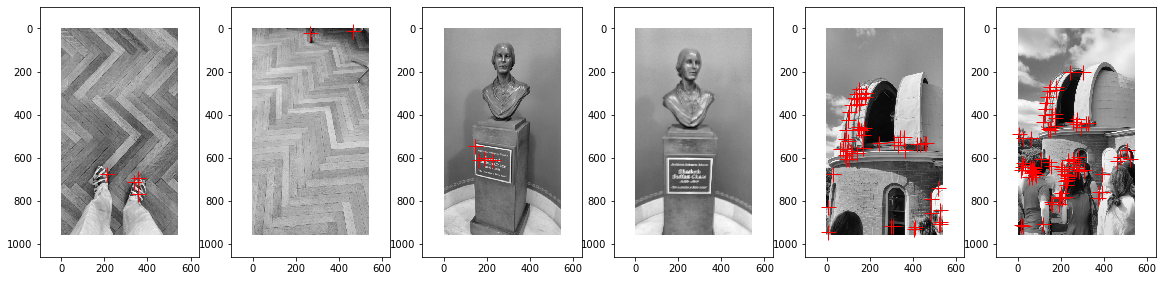

In [2]:
from matplotlib import pyplot as plt

from skimage import io, color, transform
from skimage.feature import corner_harris, peak_local_max

images = ["RISHLibrary1", "RISHLibrary2", 
          "Chase1", "Chase2", 
          "LaddObservatory1", "LaddObservatory2"]

f, axarr = plt.subplots(1,6, figsize=(20,20))

for i, image_i in enumerate(images):
    image_i += ".jpg"
    # load in different images to see where the Harris Corner Detector finds corners
    image = transform.rescale(color.rgb2gray(io.imread(image_i)),0.25)

    harris_response = corner_harris(image)
    # Note: Feel free to play with these parameters to investigate their effects
    coords = peak_local_max( harris_response, min_distance=5, threshold_rel=0.05 )
    
    axarr[i].imshow(image, cmap=plt.cm.gray)
    
    #plt.imshow(image, cmap=plt.cm.gray)
    axarr[i].plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    axarr[i].axis((-100, image.shape[1]+100, image.shape[0]+100, -100))

## Answer 1
**Image pair 1:** Change of image content, corners got only detected  in area that is only exclusive to one of the two images. No match possible because detected corners are not overlapping.

**Image pair 2:** The second image has some strong motion blur thus no corners are found. No match possible.

**Image pair 3:** Change of viewpoint but plenty of corners are detected in both images which are potentially overlapping.

## Question 2
In the Harris corner detector, what do the eigenvalues of the 'M' second moment matrix represent? Discuss both how they relate to image intensity and how we can interpret them geometrically.

## Answer 2

The eigenvalues of the second momemt matrix M are proportional to the principal curvatures. A large eigenvalue indicates a prominent gradient in that direction meaning a rapid change in image intensity (so we are perpendicular to a possible  edge). Two large eigenvalues indicate that we have a corner because we have a rapid image intensity change in two directions. 

## Question 3
Given a feature point location, the SIFT algorithm converts a 16$\times$16 patch around the feature point into a 128$\times$1 descriptor of the gradient magnitudes and orientations therein. Write pseudocode \emph{with matrix/array indices} for these steps.

Note: Do this for just one feature point at one scale; ignore the overall feature point orientation; ignore the Gaussian weighting; ignore all normalization post-processing; ignore image boundaries; ignore sub-pixel interpolation and just pick an arbitrary center within the 16$\times$16 for your descriptor. Please just explain in pseudocode how to go from the 16$\times$16 patch to the 128$\times$1 vector. You are free to simplify the gradient computation.

## Question 4

Explain the difference between the Euclidean distance and the cosine similarity metrics between descriptors. What might their geometric interpretations reveal about when each should be used? Given a distance metric, what is a good method for feature descriptor matching and why?

## Answer 4

**Euclidean distance** 

$$d = \frac{x \cdot y}{\sqrt{x \cdot x} \sqrt {y \cdot y}}$$

The euclidean distance measures the difference in magnitude between two vectors but is not directly concerned with the direction of two vectors.

**Cosine similarity**

$$d = \sqrt{\sum_{n=1}{(x_i - y_i)^2}}$$

Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. E.g. when working with text data we may be just interested in knowing the presence of certain words but not necessarily the count (because a higher word count may just be caused by a longer text).

I guess in general if I am just interested in the gradient orientations patterns present in the image but less with their magnitude the cosine similarity would be fine. On the other hand if I am also interested in the magnitude of the feature vector the euclidean distance is the better choice. To avoi changes in magnitude due to illumination changes the feature vectors are normalized to unit length (divide the vector by its length or norm)

## Something to think about

In designing a feature point matching algorithm, what characteristics might we wish it to have? How might two world points change in appearance across photographs? Consider that we might allow brightness or contrast changes, or texture changes, or lighting changes, or geometric changes in appearance like rotation and translation in three dimensions or camera perspective effects. All exist between some two photographs of real-world points. 

We are faced with a fundamental trade-off between feature point invariance (how much variation in appearance I allow and still say that two points are the same) and discriminative power (our ability to say that two points are different or the same at all). 

How should we design for this trade-off?